<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/Modelos_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist["data"], mnist["target"].astype(float)

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística.

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

#### Acima fizemos a sepração do dataset entre treino e teste. Abaixo faremos a classificação binária, assumindo o valor 1 caso o número seja par e 0 caso sejá ímpar.

In [ ]:
ytrain = np.where(ytrain%2 == 0, 1, 0)
ytest = np.where(ytest%2 == 0, 1, 0)

In [ ]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

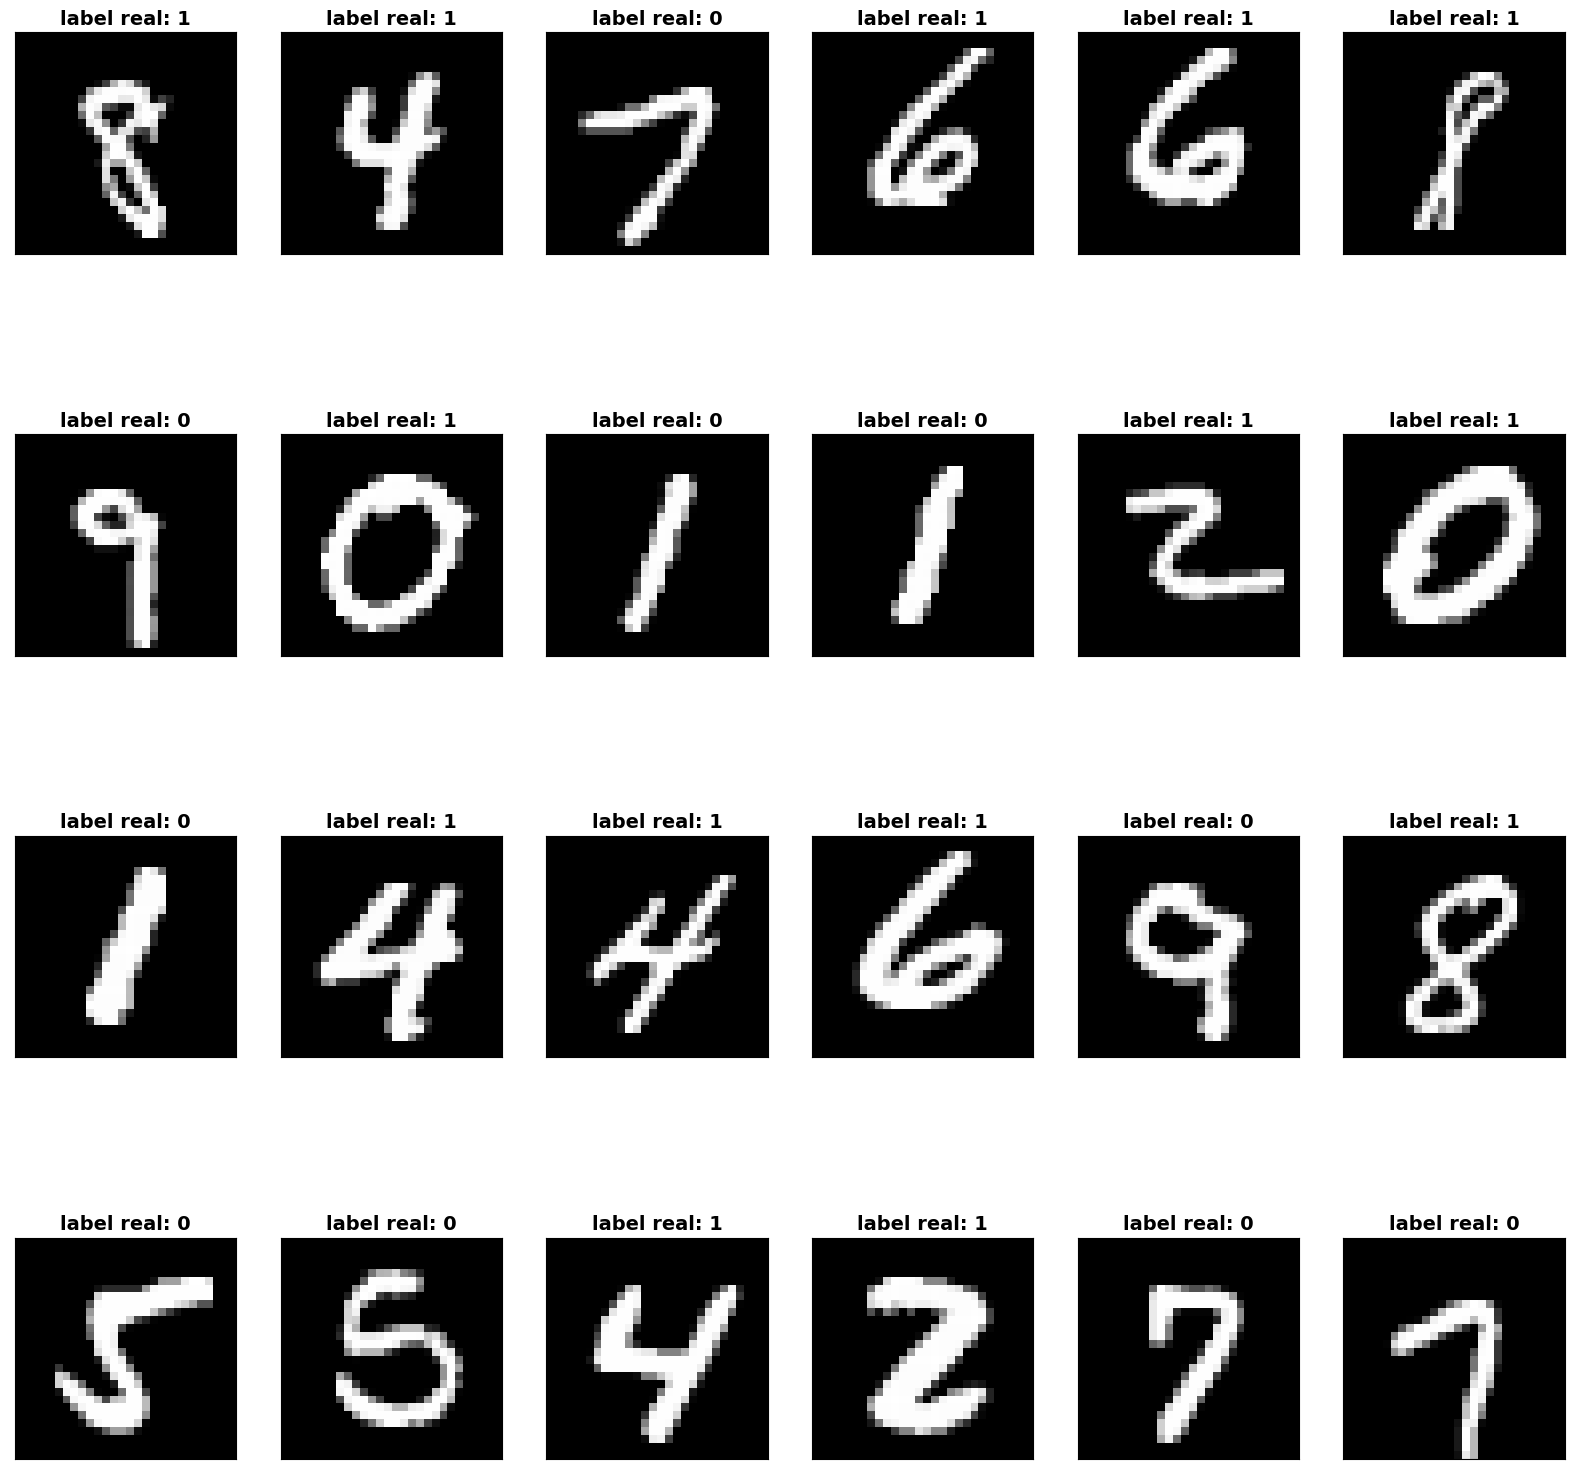

In [ ]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

#### Acima temos alguns exemplos do DataSet de treino, onde podemos observar que o código esta de acordo com o pretendido.

In [ ]:
print('Percentual de classe positiva: ',(ytrain.sum() / ytrain.size) * 100, '%')
print('Percentual de classe negativa: ',((ytrain.size-ytrain.sum()) / ytrain.size) * 100, '%')

Percentual de classe positiva:  49.154545454545456 %
Percentual de classe negativa:  50.84545454545455 %


#### Os percentuais de classe mostram um ótimo balanceamento da nossa variável target ( o que é compreensível, pois entra 0 e 9 temos a mesma quantidade de números pares e ímpares )

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
logreg.predict(Xtrain)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
logreg.predict(Xtrain)[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
ytrain[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

#### Comparando as predições com o DataSet de treino podemos observar que nosso classificar conseguiu atingir seu objetivo.

#### Vamos fazer uma validação cruzada, abaixo criaremos um exemplo qualquer

In [ ]:
X = np.random.randn(20).reshape(10,2).round(2)
X

array([[-0.33,  0.92],
       [ 0.38,  1.17],
       [-0.79, -0.17],
       [-1.97, -1.05],
       [ 0.94, -1.14],
       [ 0.38, -0.43],
       [-1.53, -0.32],
       [-0.2 ,  0.  ],
       [ 1.24, -0.24],
       [ 0.42, -0.1 ]])

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

for train_index, val_index in kf.split(X):
    print(train_index, val_index)
    print(X[train_index])
    print()
    print(X[val_index])
    print("-" * 30)

[4 5 6 7 8 9] [0 1 2 3]
[[ 0.94 -1.14]
 [ 0.38 -0.43]
 [-1.53 -0.32]
 [-0.2   0.  ]
 [ 1.24 -0.24]
 [ 0.42 -0.1 ]]

[[-0.33  0.92]
 [ 0.38  1.17]
 [-0.79 -0.17]
 [-1.97 -1.05]]
------------------------------
[0 1 2 3 7 8 9] [4 5 6]
[[-0.33  0.92]
 [ 0.38  1.17]
 [-0.79 -0.17]
 [-1.97 -1.05]
 [-0.2   0.  ]
 [ 1.24 -0.24]
 [ 0.42 -0.1 ]]

[[ 0.94 -1.14]
 [ 0.38 -0.43]
 [-1.53 -0.32]]
------------------------------
[0 1 2 3 4 5 6] [7 8 9]
[[-0.33  0.92]
 [ 0.38  1.17]
 [-0.79 -0.17]
 [-1.97 -1.05]
 [ 0.94 -1.14]
 [ 0.38 -0.43]
 [-1.53 -0.32]]

[[-0.2   0.  ]
 [ 1.24 -0.24]
 [ 0.42 -0.1 ]]
------------------------------


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
kf = KFold(n_splits = 5)

In [ ]:
classif__ = LogisticRegression()
lista_acuracia_treino = []
lista_acuracia_validacao = []

for train_index, val_index in kf.split(Xtrain, ytrain):

    Xtrain_folds = Xtrain[train_index]
    ytrain_folds = ytrain[train_index]
    Xval_fold = Xtrain[val_index]
    yval_fold = ytrain[val_index]

    classif__.fit(Xtrain_folds, ytrain_folds)

    pred_treino = classif__.predict(Xtrain_folds)
    pred_validacao = classif__.predict(Xval_fold)

    lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
    lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))


print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
print()
print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))

acurácias em treino: 
 [0.8980454545454546, 0.9018863636363637, 0.8995909090909091, 0.898090909090909, 0.9005909090909091]  
| média:  0.8996409090909092

acurácias em validação: 
 [0.8978181818181818, 0.8867272727272727, 0.8929090909090909, 0.9014545454545455, 0.89]  
| média:  0.8937818181818182


#### Utilizando a métrica Accuracy Score, vemos que a média da acurácia tanto em treino como em validação foram muito parecidas

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
roc_auc_score(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

0.9623708425682475

In [ ]:
random_classifier = np.random.choice(a = [0,1], size = ytest.size, replace = True)

roc_auc_score(y_true = ytest, y_score = random_classifier)

0.49646071201220865

In [ ]:
def validacao_cruzada(classificador,
                      X,
                      y,
                      metrica,
                      num_folds,
                      print_info = False,
                      nome_metrica = None):

    lista_metrica_treino = []
    lista_metrica_validacao = []

    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):

        Xtrain_folds = X[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X[val_index]
        yval_fold = y[val_index]

        classificador.fit(Xtrain_folds, ytrain_folds)

        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)

        lista_metrica_treino.append(metrica(y_true = pred_treino, y_score = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_true = pred_validacao, y_score = yval_fold))

    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))

    return lista_metrica_treino, lista_metrica_validacao

#### Abaixo faremos uma validação cruzada com diferentes classificadores e parâmetros.

In [ ]:
validacao_cruzada(classificador = LogisticRegression(),
                 X = Xtrain,
                 y = ytrain,
                 metrica = roc_auc_score,
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = 'AUC Score')


Métrica: AUC Score
média treino: 0.8995976817214878
média validação: 0.8937412015607782


([0.8979997681645263,
  0.9018635734320578,
  0.8995495169240543,
  0.8980396407466473,
  0.9005359093401535],
 [0.8978447430456443,
  0.8865696771029818,
  0.892858282512386,
  0.9014370063043088,
  0.8899962988385705])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

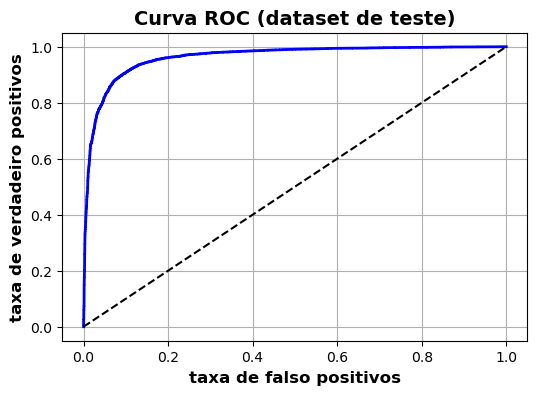

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 14, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 12, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 12, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
validacao_cruzada(classificador = KNeighborsClassifier(),
                 X = Xtrain,
                 y = ytrain,
                 metrica = roc_auc_score,
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = 'AUC Score')

Métrica: AUC Score
média treino: 0.9886812374484844
média validação: 0.9817829881509393


([0.9889452870188876,
  0.9891966607003398,
  0.9883433615064693,
  0.9884209290179371,
  0.9884999489987885],
 [0.9818984759455504,
  0.9834373783930855,
  0.9807961545772512,
  0.9833526894979765,
  0.9794302423408333])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

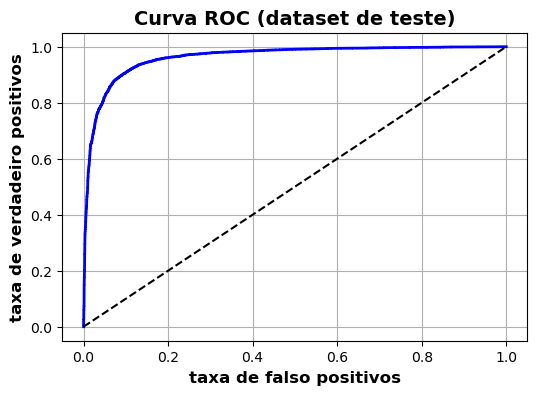

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 14, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 12, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 12, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

In [ ]:
validacao_cruzada(classificador = KNeighborsClassifier(),
                 X = Xtrain,
                 y = ytrain,
                 metrica = roc_auc_score,
                 num_folds = 3,
                 print_info = True,
                 nome_metrica = 'AUC Score')

Métrica: AUC Score
média treino: 0.9879543654676967
média validação: 0.9809829254279588


([0.9887187754079817, 0.9874528780551876, 0.9876914429399208],
 [0.9808588767027696, 0.9822881843411945, 0.9798017152399128])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true = ytest, y_score = logreg.predict_proba(Xtest)[:, 1])

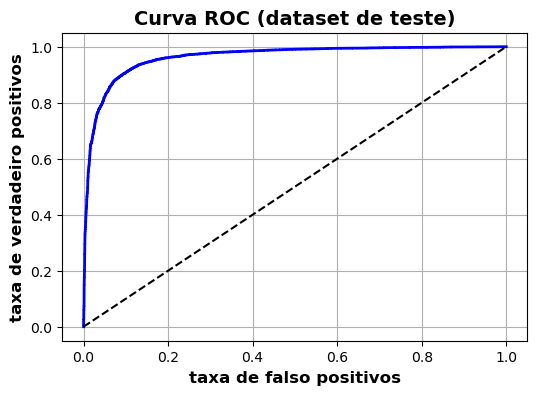

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(fpr, tpr, c = 'blue', lw = 2)
plt.title("Curva ROC (dataset de teste)", fontsize = 14, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 12, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 12, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.grid()
plt.show()

#### Dentro os classificadores utilizados, o LogisticRegression apresentou o melhor resultado ( média utilizando a métrica AUC Score )

In [ ]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
logreg.predict(Xtrain)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
logreg.predict(Xtrain)[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
ytrain[:20]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

### Utilizando o modelo com maior performance, podemos observar comparando as 20 primeiras predições, que as predições estão ok.

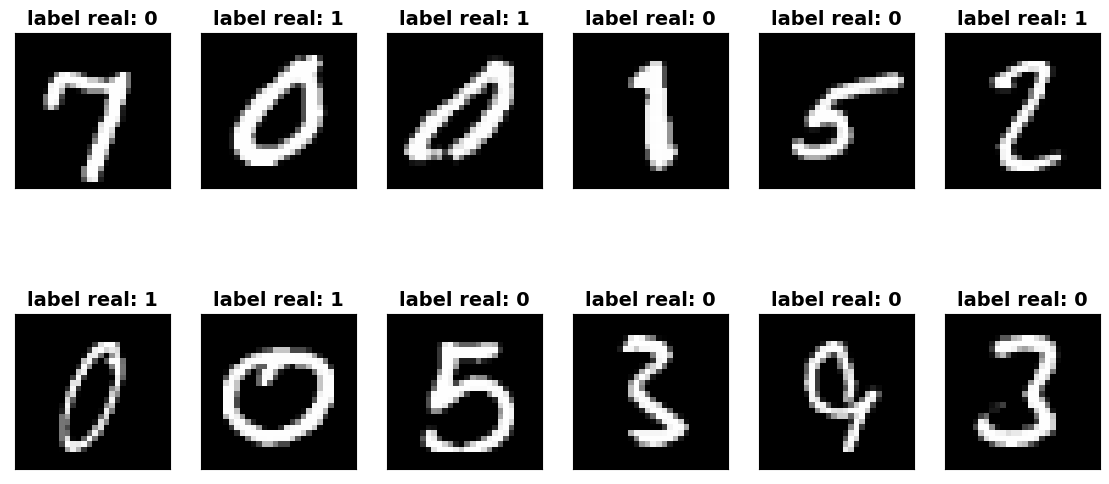

In [ ]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 12)

plt.figure(figsize=[14,14])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain[idx_i, :].reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([])
    plt.yticks([])
    plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

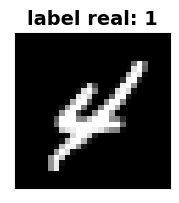

In [ ]:
plt.figure(figsize=[14,14])
xval = Xtest[5, :].reshape(28,28)
yval = ytest[5]
plt.subplot(4,6,i+1)
plt.imshow(xval, cmap = plt.cm.Greys_r)
plt.xticks([])
plt.yticks([])
plt.title("label real: "+str(yval), fontsize = 14, fontweight = 'bold')
plt.show()

### Utilizando um index aleatório no dataset de teste podemos ver que o modelo acertou a classificação